# Identify Clusters using the K-Means Algorithm

## K-Means Algorithm

https://docs.aws.amazon.com/sagemaker/latest/dg/k-means.html

# Prepare the Environment

## Upgrade the version of boto3 and sagemaker

In [24]:
%pip install -qU --upgrade boto3
%pip install -qU --upgrade sagemaker

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [9]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [3]:
sales_data = pd.read_csv('sales.csv')
sales_data.head()

,Customer ID,Age,Sales ($)
0,10001,28,69870
1,10002,32,90187
2,10003,29,60993
3,10004,31,59939
4,10005,39,150107


Text(0, 0.5, 'Sales ($)')

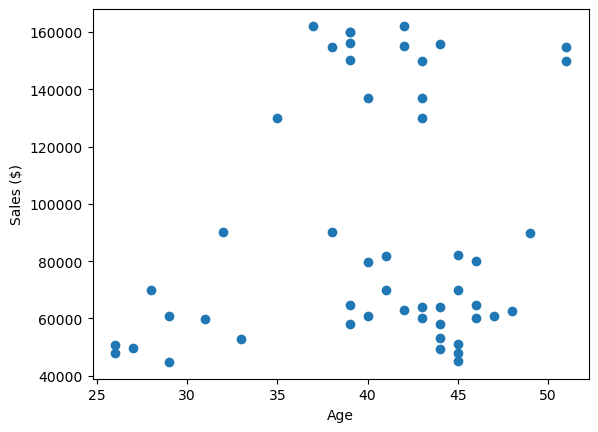

In [6]:
plt.scatter(sales_data['Age'],sales_data['Sales ($)'])
plt.xlabel('Age')
plt.ylabel('Sales ($)')

In [10]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(sales_data[['Age','Sales ($)']])
y_predicted

array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       0, 0, 2, 2, 1, 1], dtype=int32)

In [12]:
sales_data['cluster']=y_predicted
sales_data.head()

,Customer ID,Age,Sales ($),cluster
0,10001,28,69870,0
1,10002,32,90187,0
2,10003,29,60993,2
3,10004,31,59939,2
4,10005,39,150107,1


In [13]:
km.cluster_centers_

array([[4.05000000e+01, 8.03755000e+04],
       [4.15625000e+01, 1.50266625e+05],
       [3.93750000e+01, 5.64741667e+04]])

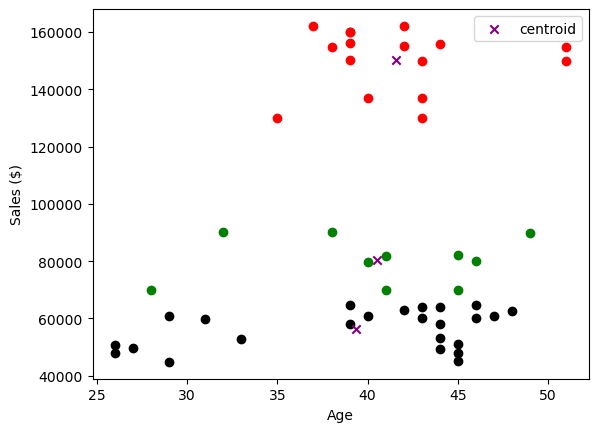

In [17]:
sales_data0 = sales_data[sales_data.cluster==0]
sales_data1 = sales_data[sales_data.cluster==1]
sales_data2 = sales_data[sales_data.cluster==2]
plt.scatter(sales_data0['Age'],sales_data0['Sales ($)'],color='green')
plt.scatter(sales_data1['Age'],sales_data1['Sales ($)'],color='red')
plt.scatter(sales_data2['Age'],sales_data2['Sales ($)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker="x",label='centroid')
plt.xlabel('Age')
plt.ylabel('Sales ($)')
plt.legend()

In [18]:
scaler = MinMaxScaler()

scaler.fit(sales_data[['Sales ($)']])
sales_data['Sales ($)'] = scaler.transform(sales_data[['Sales ($)']])

scaler.fit(sales_data[['Age']])
sales_data['Age'] = scaler.transform(sales_data[['Age']])

In [20]:
sales_data.head()

,Customer ID,Age,Sales ($),cluster
0,10001,0.08,0.213426,0
1,10002,0.24,0.386678,0
2,10003,0.12,0.137727,2
3,10004,0.20,0.128739,2
4,10005,0.52,0.897645,1


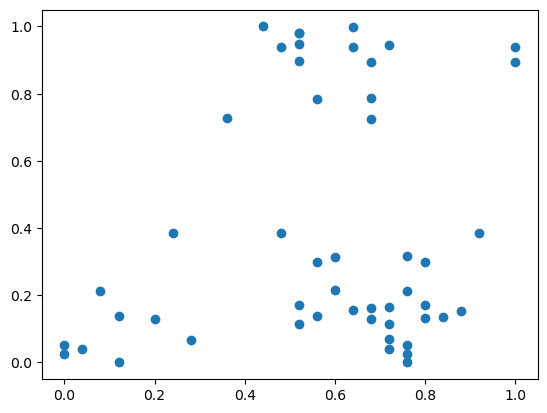

In [23]:
plt.scatter(sales_data.Age,sales_data['Sales ($)'])

In [24]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(sales_data[['Age','Sales ($)']])
y_predicted

array([2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0], dtype=int32)

In [25]:
sales_data['cluster']=y_predicted
sales_data.head()

,Customer ID,Age,Sales ($),cluster
0,10001,0.08,0.213426,2
1,10002,0.24,0.386678,2
2,10003,0.12,0.137727,2
3,10004,0.20,0.128739,2
4,10005,0.52,0.897645,0


In [26]:
km.cluster_centers_

array([[0.6225    , 0.89900591],
       [0.7024    , 0.17440495],
       [0.12      , 0.11673545]])

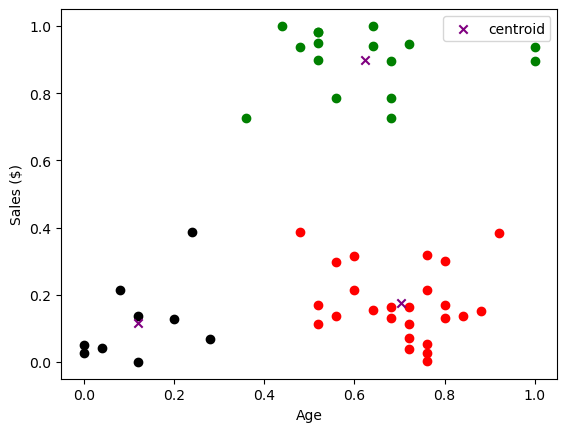

In [27]:
sales_data0 = sales_data[sales_data.cluster==0]
sales_data1 = sales_data[sales_data.cluster==1]
sales_data2 = sales_data[sales_data.cluster==2]
plt.scatter(sales_data0['Age'],sales_data0['Sales ($)'],color='green')
plt.scatter(sales_data1['Age'],sales_data1['Sales ($)'],color='red')
plt.scatter(sales_data2['Age'],sales_data2['Sales ($)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker="x",label='centroid')
plt.xlabel('Age')
plt.ylabel('Sales ($)')
plt.legend()

In [28]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(sales_data[['Age','Sales ($)']])
    sse.append(km.inertia_)

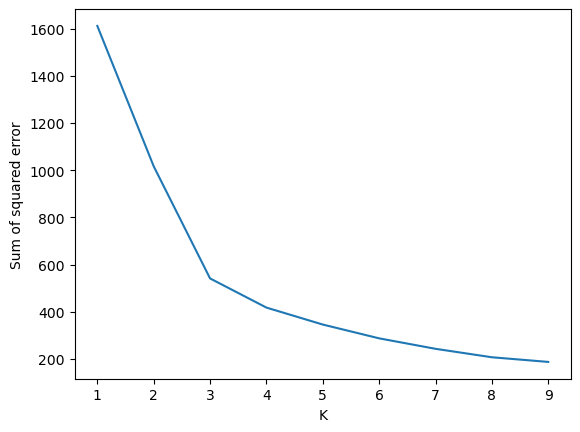

In [46]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)